In [18]:
%matplotlib notebook

# GreEn-ER Dataset
The data set consists of electrical consumption data for the GreEn-ER building, as well as meteorological data since September 2016 for each hour

This is a subset of the available measures. The objective is to predict the electricity consumption due to heating over either a 1-day, 2-day, or 3-day period, using the different data available on day D (one hour sampling period). There are more than $30$ variable that includes 
  - Electrical consumption for heating (kWh)
  - Outdoor temperature (Deg C)
  - Global measured radiation (RSR2 sensor, averaged over one hour, W/m^2)
  - Time of day for measurements (0 to 23 hours)
  - day of the week
  - ...


## Loading training data

In [28]:
import scipy.io as sio
import numpy as np
greener_train= sio.loadmat('greener_conso_meteo_training.mat')
X_train= greener_train['data']
Y1_train= greener_train['target1day'].ravel() # electricity consumption for heating at 1-day 
Y2_train= greener_train['target2day'].ravel() # electricity consumption for heating at 2-day 
Y3_train= greener_train['target3day'].ravel() # electricity consumption for heating at 3-day 
X_train.shape

(4000, 35)

## Features (available measurements)

In [16]:
print('{0} variables\n'.format(X_train.shape[1]))
vbls= greener_train['variable_names']
variable_names = [vbls[0][i][0] for i in range(vbls.shape[1])]
print(variable_names)

35 variables

['AutresElec', 'Chauffage', 'Eclairage', 'Froid', 'PrisesCourant', 'Ventilation', 'CR1000_Alim_Avg', 'CR1000_Temp_Avg', 'AirTemp_Avg', 'RH_Avg', 'Press_Avg', 'WSpd_Avg', 'WDir_Avg', 'WSpd_Max', 'Rain_Tot', 'Ray_Global_CMP3_Avg', 'Ray_Global_CMP3_Energy_Tot', 'Ray_Global_RSR2_Avg', 'Ray_Direct_RSR2_Avg', 'Ray_Direct_H_RSR2_Avg', 'Ray_Diffus_RSR2_Avg', 'Ray_Global_RSR2_Energy_Tot', 'Ray_Direct_RSR2_Energy_Tot', 'Ray_Diffus_RSR2_Energy_Tot', 'Ray_Global_RSR2_Raw_Avg', 'Ray_Direct_RSR2_Raw_Avg', 'Ray_Diffus_RSR2_Raw_Avg', 'Hours', 'isMonday', 'isTuesday', 'isWednesday', 'isThursday', 'isFriday', 'isSaturday', 'isSunday']


In [17]:
vunits= greener_train['variable_units']
variable_units = [vunits[0][i][0] for i in range(vunits.shape[1])]
print(variable_units)

['kWh', 'kWh', 'kWh', 'kWh', 'kWh', 'kWh', 'Volts', 'Deg C', 'Deg C', '%', 'mbar', 'm/s', 'Deg', 'm/s', 'mm', 'W/m^2', 'J/m^2', 'W/m^2', 'W/m^2', 'W/m^2', 'W/m^2', 'kWh/m^2', 'kWh/m^2', 'kWh/m^2', 'W/m^2', 'W/m^2', 'W/m^2']


### Responses
We have $n=4000$ samples of the Heating elactrical consumption at day D+1, also D+2, and D+3. We can plot them

<IPython.core.display.Javascript object>


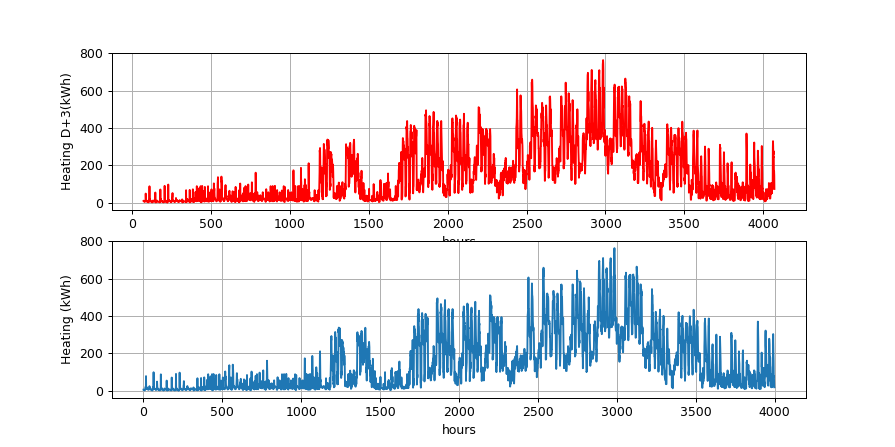

In [20]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax1= plt.subplot(211)
plt.plot(np.arange(4000)+3*24, Y3_train[:],'r')
plt.grid()
plt.xlabel('hours')
plt.ylabel('Heating D+3(kWh)')
plt.subplot(212)
plt.plot(X_train[:,1])
plt.grid()
plt.xlabel('hours')
plt.ylabel('Heating (kWh)')


## Pipeline example to perform PCA on real-word datasets (missing values, scaling, ...)

In [58]:
from sklearn.impute import SimpleImputer
import time

# impute missing data
#imp = Imputer(missing_values=np.nan, strategy='mean') #deprecated since scikit-learn 0.20.1
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp= imp.fit_transform(X_train)

# Example of lasso selection with BIC validation
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_imp, Y1_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_
print('elapsed time: {0} (s)'.format(t_bic))
print('estimated optimal penalty: -log(alpha)= {0} \n'.format(-np.log10(alpha_bic_)) )
idx_r= model_bic.coef_.nonzero()[0]

for i in idx_r:
    print(str( variable_names[i] ) )

elapsed time: 0.02894282341003418 (s)
estimated optimal penalty: -log(alpha)= 1.1805037813499393 

Chauffage
CR1000_Alim_Avg
AirTemp_Avg
RH_Avg
Ray_Diffus_RSR2_Avg
isMonday
isSaturday


## Loading test data
Here we have a test set in order to estimate true performances and validate the method/prediction rule


In [ ]:
greener_test= sio.loadmat('greener_conso_meteo_test.mat')
X_test= greener_test['data']
Y1_test= greener_test['target1day'].ravel()
Y2_test= greener_test['target2day'].ravel()
Y3_test= greener_test['target3day'].ravel()

 # TODO
 
- Train some linear models to predict the responses (heating electrical consumption at Days D+1, D+2 or D+3)
- Select the most significant variables to improve both accuracy/interpretability
    - use selection methods: subset selection, lasso, ...
    - use validation methods: information criterion, cross validation, ...
- display the predictions 
- evaluate performance and test error rate as a function of the parameters/methods
- ...